In [8]:
import time
import struct as st
import numpy as np

In [3]:
stime = time.time()
print(stime)

1575133223.548621


In [4]:
filename = {
    'images': 'train-images-idx3-ubyte',
    'labels': 'train-labels.idx1-ubyte'}
images_array = np.array([])
labels_array = np.array([])

In [6]:
print(images_array.shape)
for name in filename.keys():
    if name == 'images':
#         Provide the file path for images and labels
        imagesfile = open('~/train-images-idx3-ubyte','rb')
    if name == 'labels':
        labelsfile = open('~/train-labels-idx1-ubyte','rb')

In [14]:
imagesfile.seek(4)
nImg = st.unpack('>I', imagesfile.read(4))[0]  # num of images/labels
nR = st.unpack('>I', imagesfile.read(4))[0]  # num of rows
nC = st.unpack('>I', imagesfile.read(4))[0]  # num of columns
labelsfile.seek(8)  # Since no. of items = no. of images and is already read
print("no. of images :: ", nImg)
print("no. of rows :: ", nR)
print("no. of columns :: ", nC)

no. of images ::  60000
no. of rows ::  28
no. of columns ::  28


In [15]:
temp_array = np.array([])
images10000_array = np.array([])
for i in range(1, nImg + 1):
    # Read labels
    labels_array = np.append(labels_array, st.unpack('>B', labelsfile.read(1))[0])
    # Read training images
    if temp_array.size == 0:
        # invert the image as 255 is white and 0 is black
        temp_array = 255 - np.asarray(st.unpack('>784B', imagesfile.read(784))).reshape((nR, nC))
    else:
        nextimage = 255 - np.asarray(st.unpack('>784B', imagesfile.read(784))).reshape((nR, nC))
        if len(temp_array.shape) == 2:
            temp_array = np.vstack((temp_array[None], nextimage[None]))
        else:
            temp_array = np.vstack((temp_array, nextimage[None]))

    # Extra stuffs to speed up the stacking process (took 51.804361105 seconds in my case)
    # Stacking each 1000 block to form a block of 10000
    if i % 1000 == 0 and i != 0:
        if images10000_array.size == 0:
            images10000_array = temp_array
        else:
            images10000_array = np.vstack((images10000_array, temp_array))
        temp_array = np.array([])
    # Stacking each 10000 block to form the whole dataset
    if i % 10000 == 0 and i != 0:
        if images_array.size == 0:
            images_array = images10000_array
        else:
            images_array = np.vstack((images_array, images10000_array))
        images10000_array = np.array([])

        print((float(i) / nImg * 100), "% complete...")


16.666666666666664 % complete...
33.33333333333333 % complete...
50.0 % complete...
66.66666666666666 % complete...
83.33333333333334 % complete...
100.0 % complete...


In [16]:
print(labels_array.shape)
print(images_array.shape)

(60000,)
(60000, 28, 28)


In [20]:
#Picking up 1000 samples from the training set
n=60000
images_array_n60000 = images_array[-n:]
images_array_n60000 = images_array_n60000.reshape(n, 28*28)
print(images_array_n60000.shape)

(60000, 784)


In [23]:
# Picking the first 1000 labels and converting the values to integer
labels_array_n60000 = labels_array[-n:]
print(labels_array_n60000.shape)
labels_array_n60000 = [int(i) for i in labels_array_n60000]

(60000,)


In [27]:
# For desired outputs converting to one hot encoding form
d = np.zeros((n, 10))
d[np.arange(n), labels_array_n60000] = 1
for i in range(0, n):
    d[i] = [int(item) for item in d[i]]
print(d[0])

# Code for Multicategory PTA for 60000 training samples
# Initiating weight matrix with values from -100 to 100
W = np.zeros(shape=(10, 784))
W = np.array(np.random.randint(-100, 100, (10, 784)))
tempWx1 = np.zeros(shape=(10, 784))
print(W.shape)

eta = 1
threshold = 0

epoch = 0
errors = [0]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10, 784)


In [7]:
while True:
#     print('Epoch ' + str(epoch))
    print(errors[epoch - 1]/n )
    if (epoch == 0 and 1!=1) or (epoch>0 and errors[epoch - 1]/n <= threshold):
        break
    else:
        
        for i in range(0, n):
            v = W.dot(images_array_n60000[i].transpose())
            vmaxpos = np.where(v == np.amax(v))[0]
            for item in range(0, 10):
              v[item]=0 if item != vmaxpos else 1
            if np.array_equal(v, d[i].transpose()):
                continue
            else:                
                errors[epoch] = errors[epoch] + 1
        print(errors[epoch])
        epoch = epoch+1        
        errors.append(0)
        for i in range(0, n):
            # tempWx dimension 10 x 1
            tempWx = W.dot(images_array_n60000[i].transpose())
            for j in range(0, 10):
                tempWx[j] = 0 if tempWx[j] < 0 else 1
            tempWx1 = np.subtract(d[i].transpose(), tempWx).reshape(10, 1).dot(images_array_n60000[i].reshape(1, 784))
            W = W + eta * tempWx1
errors = errors[:-1]

In [36]:
# Code for testing the samples and calculating the errors
# Below code gets the data into numpy arrays from the test files
filename_test = {
    'images': '/Users/varunyayanamadala/Documents/Sem1 Courses/Neural Networks/Assignments/HW2/t10k-images-idx3-ubyte',
    'labels': '/Users/varunyayanamadala/Documents/Sem1 Courses/Neural Networks/Assignments/HW2/t10k-labels-idx1-ubyte'}
images_test_array = np.array([])
labels_test_array = np.array([])

for name in filename.keys():
    if name == 'images':
        imagesfile = open(
            '/Users/varunyayanamadala/Documents/Sem1 Courses/Neural Networks/Assignments/HW2/t10k-images-idx3-ubyte',
            'rb')
    if name == 'labels':
        labelsfile = open(
            '/Users/varunyayanamadala/Documents/Sem1 Courses/Neural Networks/Assignments/HW2/t10k-labels-idx1-ubyte',
            'rb')


In [37]:
imagesfile.seek(4)
nImg = st.unpack('>I', imagesfile.read(4))[0]  # num of images/labels
nR = st.unpack('>I', imagesfile.read(4))[0]  # num of rows
nC = st.unpack('>I', imagesfile.read(4))[0]  # num of columns
labelsfile.seek(8)  # Since no. of items = no. of images and is already read
print("no. of images :: ", nImg)
print("no. of rows :: ", nR)
print("no. of columns :: ", nC)


no. of images ::  10000
no. of rows ::  28
no. of columns ::  28


In [38]:
temp_array = np.array([])
images10000_array = np.array([])

In [39]:
for i in range(1, nImg + 1):
    # Read labels
    labels_test_array = np.append(labels_test_array, st.unpack('>B', labelsfile.read(1))[0])
    # Read training images
    if temp_array.size == 0:
        # invert the image as 255 is white and 0 is black
        temp_array = 255 - np.asarray(st.unpack('>784B', imagesfile.read(784))).reshape((nR, nC))
    else:
        nextimage = 255 - np.asarray(st.unpack('>784B', imagesfile.read(784))).reshape((nR, nC))
        if len(temp_array.shape) == 2:
            temp_array = np.vstack((temp_array[None], nextimage[None]))
        else:
            temp_array = np.vstack((temp_array, nextimage[None]))

    # Extra stuffs to speed up the stacking process (took 51.804361105 seconds in my case)
    # Stacking each 1000 block to form a block of 10000
    if i % 1000 == 0 and i != 0:
        if images10000_array.size == 0:
            images10000_array = temp_array
        else:
            images10000_array = np.vstack((images10000_array, temp_array))
        temp_array = np.array([])
    # Stacking each 10000 block to form the whole dataset
    if i % 10000 == 0 and i != 0:
        if images_test_array.size == 0:
            images_test_array = images10000_array
        else:
            images_test_array = np.vstack((images_test_array, images10000_array))
        images10000_array = np.array([])

        print((float(i) / nImg * 100), "% complete...")

100.0 % complete...


In [40]:
images_test_array = images_test_array.reshape(10000, 28*28)

In [41]:
labels_test_array = [int(i) for i in labels_test_array]
# For desired outputs converting to one hot encoding form
d_test = np.zeros((10000, 10))
d_test[np.arange(10000), labels_test_array] = 1
for i in range(0, 10000):
    d_test[i] = [int(item) for item in d_test[i]]
print(d_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [42]:
errors_test=0
for i in range(0, 10000):
            v = W.dot(images_test_array[i].transpose())
            vmaxpos = np.where(v == np.amax(v))[0]
            for item in range(0, 10):
              v[item]=0 if item != vmaxpos else 1
            if np.array_equal(v, d_test[i].transpose()):
                continue
            else:                
                errors_test = errors_test + 1

In [43]:
errors_test

1722

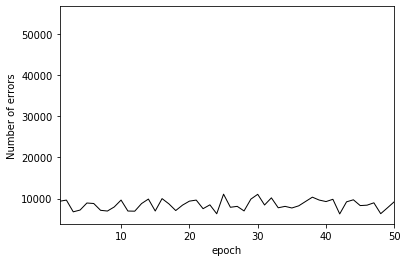

In [46]:
import matplotlib.pyplot as plt
ax2 = plt.subplot(111)


xAxisPoints = list(range(epoch))
yAxisPoints = errors

ax2.plot(xAxisPoints, yAxisPoints, color="black", lw=1)
plt.xlim(1,epoch-1)
plt.xlabel('epoch')
plt.ylabel('Number of errors')
plt.show()

In [47]:
percentageMisclassifications=(errors_test/10000)*100

In [48]:
percentageMisclassifications

17.22